## Atividade Avaliativa 2 
Nome: Murilo Martinez Zaina \
Nro Matrícula: 2022004897
\
ATENÇÃO: Renomei o arquivo para "seu_nro_matric.ipynb"

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from scipy.stats import poisson, norm

Questão 1 [valor: 1,0]\
Considere o dataset "world_population2.csv". \
a) Obtenha a média, mediana e desvio padrão da taxa de fertilidade (Fert. Rate) \
b) Gere um boxplot da taxa de fertilidade por continente.

In [5]:
pop = pd.read_csv("world_population2.csv", encoding='latin-1')
fert = pop['Fert. Rate']
media = np.mean(fert) 
mediana = np.median(fert) 
dv = np.std(fert)

2.693969849246231

In [6]:
media

2.693969849246231

In [7]:
mediana

2.3

In [8]:
dv

1.2662863914697915

C:\Users\fhzai\AppData\Local\Temp\ipykernel_2908\2809871698.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  continente = pop.groupby(by=["Continent"]).sum()


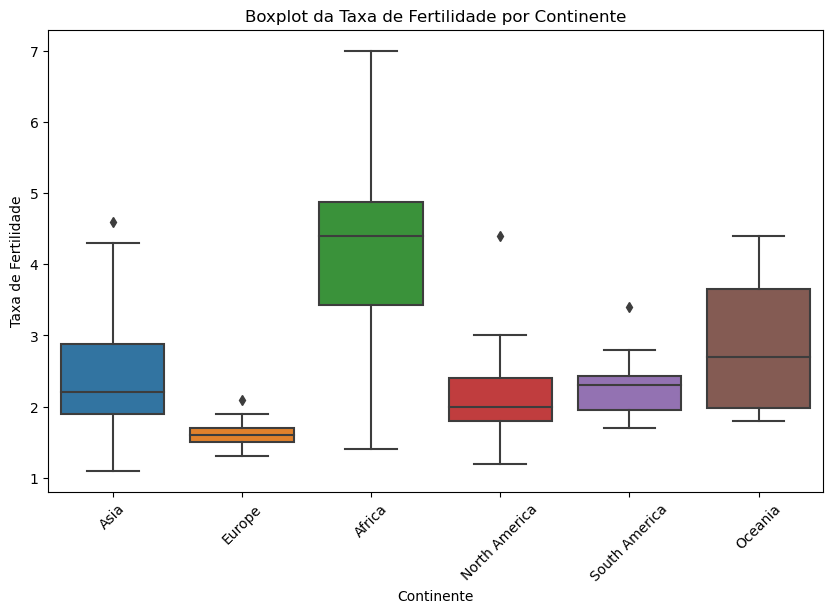

In [17]:
continente = pop.groupby(by=["Continent"]).sum()
plt.figure(figsize=(10, 6))
sns.boxplot(x="Continent", y="Fert. Rate", data=pop)
plt.xlabel("Continente")
plt.ylabel("Taxa de Fertilidade")
plt.title("Boxplot da Taxa de Fertilidade por Continente")
plt.xticks(rotation=45)
plt.show()

Questão 2 [valor: 1,5]\
Considere o dataset "world_population2.csv". Plote um gráfico de pizza que mostre a porcentagem da 
população mundial por continente. \
Dica: use => df[['XXX', 'XXX']].groupby('XXX').aggregate(sum)

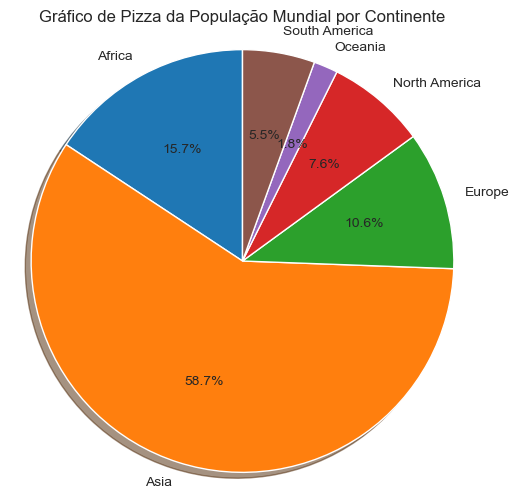

In [21]:
pop = pd.read_csv("world_population2.csv", encoding='latin-1')
continente = pop.groupby(by=["Continent"])["Population (2020)"].sum()
plt.figure(figsize=(6, 6))
plt.pie(continente, labels=continente.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Gráfico de Pizza da População Mundial por Continente')
plt.axis('equal')
plt.show()

Questão 3 [valor: 1,5]\
Considere o dataset "world_population2.csv". Plote um gráfico de barras que mostre a média da população urbana (Urban Pop %) por continente. \
Dica: use => df[['XXX', 'XXX']].groupby('XXX').aggregate('mean')

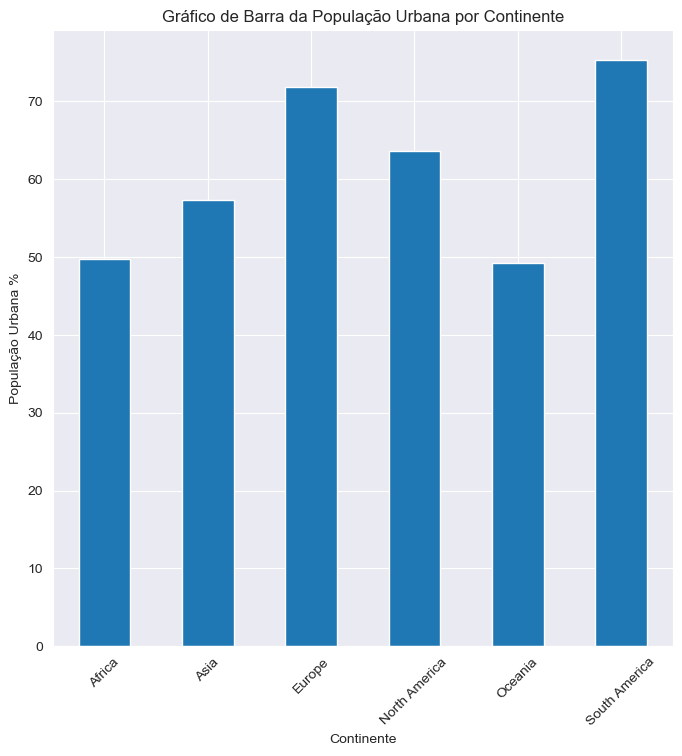

In [27]:
pop = pd.read_csv("world_population2.csv", encoding='latin-1')
continente = pop.groupby(by=["Continent"])["Urban Pop %"].mean()
plt.figure(figsize=(8, 8))
continente.plot(kind='bar')
plt.title('Gráfico de Barra da População Urbana por Continente')
plt.xlabel('Continente')
plt.ylabel('População Urbana %')
plt.xticks(rotation=45)  
plt.show()

Questão 4 [valor: 1,5]\
 Uma empresa vende lotes contendo 100 unidades de barras de ferro. Tendo em vista que a taxa de defeitos é de 18% e que uma amostra de 8 peças foi retirada do lote, plote a distribuição de probabilidade de termos 0, 1, 2, ..., 8 peças defeituosas na amostra.

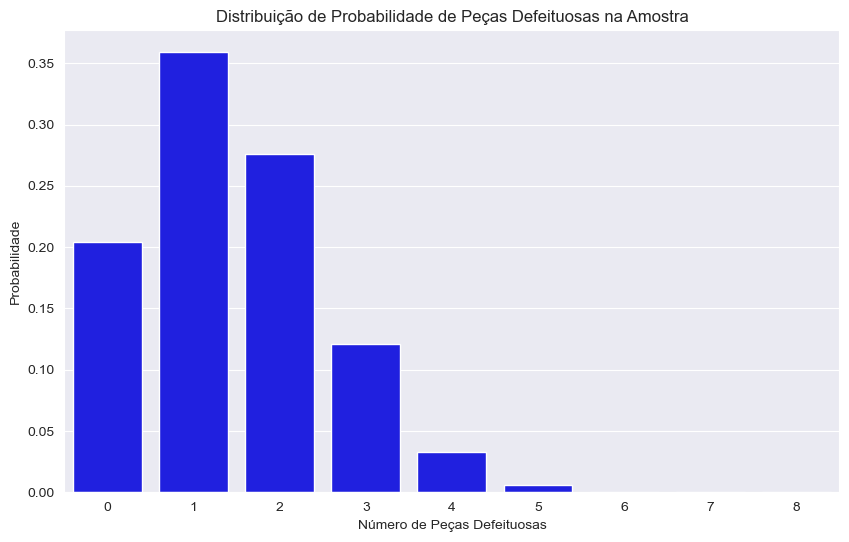

In [28]:
amostra = 8
defeito = 0.18
probabilidades = []
for i in range(amostra + 1):
    probabilidade = (np.math.comb(amostra, i)) * (defeito ** i) * ((1 - defeito) ** (amostra - i))
    #math.comb() retorna o número de maneiras de escolher x resultados não ordenados de y possibilidades sem repetição
    probabilidades.append(probabilidade)
plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(0, amostra + 1), y=probabilidades, color='blue')
plt.xlabel('Número de Peças Defeituosas')
plt.ylabel('Probabilidade')
plt.title('Distribuição de Probabilidade de Peças Defeituosas na Amostra')
plt.show()

Questão 5 [valor: 1,5]\
A chegada de ônibus em um terminal acontece à razão de 3 por minuto, em média. Determine a probabilidade de: \
a) Chegarem exatamente 8 ônibus em 2 minutos. \
b) Chegarem menos de 2 ônibus em 1 minuto.

In [37]:
poisson.pmf(8, 3 * 2)

0.1032577335308442

In [38]:
poisson.cdf(1, 3)

0.1991482734714558

Questão 6 [valor: 1,5]\
Uma fábrica produz pisos laminados com comprimento de 2.000 mm e desvio padrão de 15 mm. Simule a produção de 3.000 pisos. \
A) Obtenha 100 amostras contendo a média de 30 pisos e plote um gráfico da distribuição das médias.
B) Qual é a probabilidade de obter amostras com comprimento de 2.020 mm ou mais?

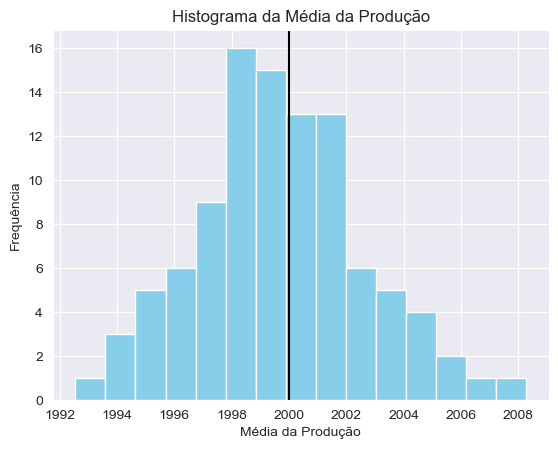

In [48]:
producao = np.random.normal(2000, 15, 3000)
media100 = producao.reshape(100, 30).mean(axis=1)

plt.hist(media100, bins=15, color='skyblue')
plt.axvline(2000, color='k')
plt.xlabel('Média da Produção')
plt.ylabel('Frequência')
plt.title('Histograma da Média da Produção')
plt.show()

In [51]:
norm.sf(2020, 2000, 15)

0.09121121972586788

Questão 7 [valor: 1,5]\
Suponha que uma máquina envase garrafas de vinho com média 750 ml e desvio padrão de 15 ml. A vinícola decidiu realizar um teste de hipótese com erro alfa = 0,08 e duas caudas. \
a) Obtenha o Z crítico para esse teste. \
b) Considere que tenha sido tomada uma única amostra contendo 726 ml. Obtenha o Z calc e informe o resultado do teste. \
c) Considere que tenham sido tomadas 4 amostras e a média obtida foi 736 ml. Obtenha o Z calc e informe o resultado do teste.

In [53]:
alfa = 0.08 
area_da_cauda = alfa / 2  

z_critico = norm.ppf(1 - area_da_cauda)

print(f"O valor crítico de Z é: {z_critico:.4f}")

O valor crítico de Z é: 1.7507


In [54]:
media_populacao = 750  
dv_populacao = 15  
amostra = 1

valor_amostra = 726

z_calc = (valor_amostra - media_populacao) / (dv_populacao / (amostra**0.5))

print(f"O valor de Z calc é: {z_calc:.4f}")

O valor de Z calc é: -1.6000


In [55]:
media_populacao = 750  
dv_populacao = 15  
amostra = 4

valor_amostra = 736

z_calc = (valor_amostra - media_populacao) / (dv_populacao / (amostra**0.5))

print(f"O valor de Z calc é: {z_calc:.4f}")

O valor de Z calc é: -1.8667
